# Guía 5 - Transformada Z

## Ejercicio 4

Considere el sistema continuo
$$
H(s) = \frac{12500s}{44s^2 + 60625s + 625 \cdot 10^4}
$$

y obtenga la función de transferencia $H(z)$ del sistema discreto correspondiente, mediante la utilización de las transformaciones conformes de Euler y Bilineal. Para ello:
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde la respuesta cae 3dB respecto al valor máximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de muestreo cuatro veces superior a ésta.
2. Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos y compárelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes.

### Solución

Utilizando transformaciones conformes de Euler y Bilineal obtenemos las expresiones de las funciones de transferencia $H(z)$
- Euler:
$$
H\left( \frac{1-z^{-1}}{T} \right) = \frac{12500\left( \frac{1-z^{-1}}{T} \right)}{44\left( \frac{1-z^{-1}}{T} \right)^2 + 60625\left( \frac{1-z^{-1}}{T} \right) + 625 \cdot 10^4}
$$
- Bilineal
$$
H\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) = \frac{12500\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)}{44\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)^2 + 60625\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) + 625 \cdot 10^4}
$$

1. Para determinar la frecuencia de corte obtenemos la respuesta en frecuencia del sistema continuo ($H(s)$ para $s=j\omega$), obtenemos el maximo y luego la frecuencia con respuesta 3dB menor al maximo.

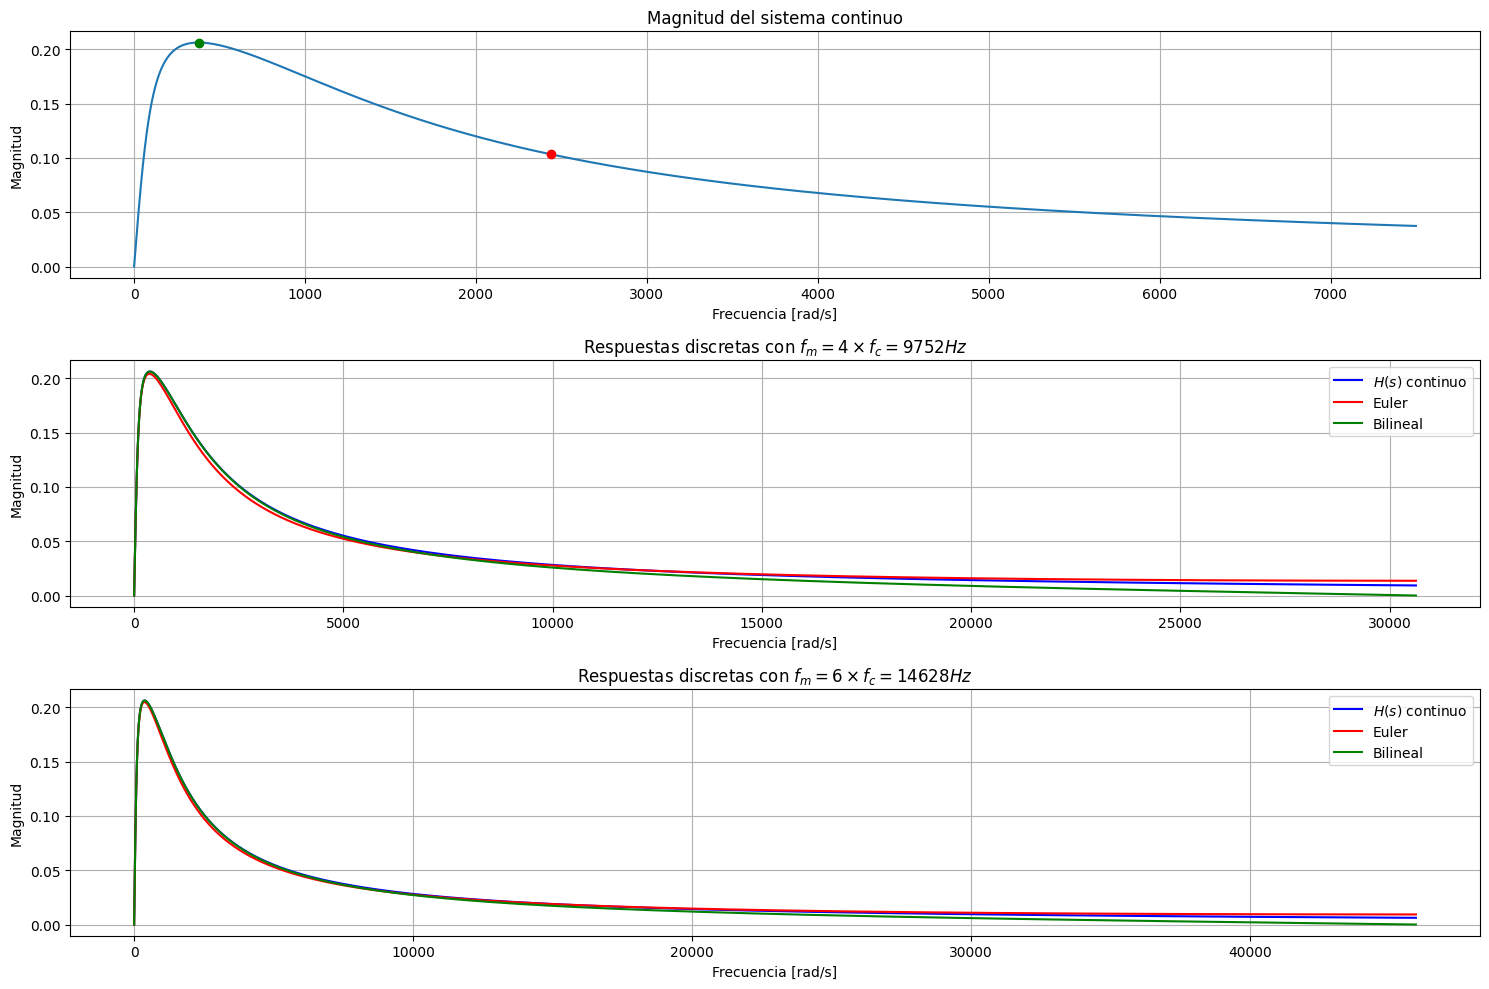

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sEuler(T, z):
    return (1 - z**-1) / T

def sBilineal(T, z):
    return (2 / T) * (1 - z**-1) / (1 + z**-1)

def Hs(s):
    return 12500 * s / (44 * s**2 + 60625 * s + 6250000)

def dB(magnitude):
    return 20 * np.log10(np.abs(magnitude))

fmtest = 15000
s = 1j * np.arange(fmtest // 2)

Hs_mag = np.abs(Hs(s))
fMax = np.argmax(Hs_mag)
maxMag = Hs_mag[fMax]

fCorte = fMax
while fCorte < len(Hs_mag)-1 and dB(Hs_mag[fCorte]) > dB(maxMag) - 3:
    fCorte += 1

fm = 4 * fCorte
T = 1 / fm
f = np.arange(fm // 2)
omega = np.linspace(0, np.pi, len(f), endpoint=False)
z = np.exp(1j * omega)
HEuler = Hs(sEuler(T, z))
HBilineal = Hs(sBilineal(T, z))

fm2 = 6 * fCorte
T2 = 1 / fm2
f2 = np.arange(fm2 // 2)
omega2 = np.linspace(0, np.pi, len(f2), endpoint=False)
z2 = np.exp(1j * omega2)
HEuler2 = Hs(sEuler(T2, z2))
HBilineal2 = Hs(sBilineal(T2, z2))

w = np.linspace(0, np.pi * fm, len(f), endpoint=False)
w2 = np.linspace(0, np.pi * fm2, len(f2), endpoint=False)

fig, ax = plt.subplots(3, 1, figsize=(15, 10))
for axi in ax:
    axi.grid()

ax[0].plot(np.abs(s), dB(Hs_mag))
ax[0].plot(fMax, dB(Hs_mag[fMax]), 'go')
ax[0].plot(fCorte, dB(Hs_mag[fCorte]), 'ro')
ax[0].set_title('Magnitud del sistema continuo (dB)')
ax[0].set_xlabel('Frecuencia [rad/s]')
ax[0].set_ylabel('Magnitud [dB]')

ax[1].plot(w, dB(Hs(1j * w)), 'b', label='$H(s)$ continuo')
ax[1].plot(w, dB(HEuler), 'r', label='Euler')
ax[1].plot(w, dB(HBilineal), 'g', label='Bilineal')
ax[1].set_title(f'Respuestas discretas con $f_m = 4 \\times f_c = {fm} Hz$')
ax[1].set_xlabel('Frecuencia [rad/s]')
ax[1].set_ylabel('Magnitud [dB]')
ax[1].legend()

ax[2].plot(w2, dB(Hs(1j * w2)), 'b', label='$H(s)$ continuo')
ax[2].plot(w2, dB(HEuler2), 'r', label='Euler')
ax[2].plot(w2, dB(HBilineal2), 'g', label='Bilineal')
ax[2].set_title(f'Respuestas discretas con $f_m = 6 \\times f_c = {fm2} Hz$')
ax[2].set_xlabel('Frecuencia [rad/s]')
ax[2].set_ylabel('Magnitud [dB]')
ax[2].legend()

plt.tight_layout()
plt.show()
